<center><b>PERTEMUAN 4<br>
    TUGAS PRAKTIKUM <br><br></b></center>
Membaca artikel yang sudah diupload pada newlms terkait dengan naïve bayes. Silahkan pilih artikel yang Anda sukai. Telusuri data yang terdapat pada artsikel tersebut. Coba untuk melakukan kembali pada salah satu data yang memang tersedia dan buat report dan terapkan dengan mengguankan Naïve Bayes.
<br><br>
Nama : Siti Khotimatul Wildahh<br>
NIM  : G6601231010

<b>Prepare Dataset</b>

In [ ]:
import numpy as np 
import pandas as pd 

import re
import os
for dirname, _, filenames in os.walk('/content/drive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt

In [3]:
df =pd.read_csv('../content/drive/fakedb_train.csv')

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
x= df.drop('label',axis=1)

In [6]:
x.head(2)

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...


In [7]:
y = df['label']

In [8]:
df.shape

(20800, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


<b>Pengecekan Data Kosong </b>

In [10]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [11]:
df=df.dropna()

In [12]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [13]:
df['title'][3]

'15 Civilians Killed In Single US Airstrike Have Been Identified'

In [14]:
messeges =df.copy()

In [15]:
messeges.reset_index(inplace=True)

In [16]:
messeges.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [22]:
import nltk
nltk.download('stopwords')

import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []
for i in range(0, len(messeges)):
    review = re.sub('[^a-zA-Z]', ' ', messeges['title'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus[6]

<b>Vectorization</b>

In [23]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [24]:
# show resulting vocabulary; the numbers are not counts, they are the position in the sparse vector.
cv.vocabulary_

{'hous': 2049,
 'dem': 1103,
 'aid': 89,
 'even': 1453,
 'see': 3868,
 'comey': 820,
 'letter': 2457,
 'jason': 2241,
 'chaffetz': 645,
 'tweet': 4613,
 'comey letter': 822,
 'jason chaffetz': 2242,
 'flynn': 1665,
 'hillari': 1985,
 'clinton': 751,
 'big': 396,
 'woman': 4916,
 'campu': 574,
 'breitbart': 489,
 'hillari clinton': 1987,
 'campu breitbart': 575,
 'truth': 4598,
 'might': 2698,
 'get': 1789,
 'fire': 1627,
 'civilian': 734,
 'kill': 2334,
 'singl': 3982,
 'us': 4671,
 'airstrik': 98,
 'identifi': 2086,
 'us airstrik': 4672,
 'iranian': 2196,
 'jail': 2230,
 'fiction': 1596,
 'stori': 4167,
 'stone': 4164,
 'death': 1064,
 'jacki': 2228,
 'mason': 2611,
 'hollywood': 2020,
 'would': 4945,
 'love': 2534,
 'trump': 4503,
 'bomb': 451,
 'north': 2949,
 'korea': 2359,
 'lack': 2378,
 'tran': 4459,
 'bathroom': 340,
 'exclus': 1472,
 'video': 4720,
 'north korea': 2952,
 'win': 4894,
 'french': 1726,
 'socialist': 4033,
 'parti': 3138,
 'presidenti': 3366,
 'nomin': 2945,
 'ne

In [25]:
X.shape

(18285, 5000)

In [26]:
y=messeges['label']

In [27]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [30]:
feature_names = cv.get_feature_names_out()
print(feature_names[:20])


['abandon' 'abc' 'abc news' 'abduct' 'abe' 'abedin' 'abl' 'abort' 'abroad'
 'absolut' 'abstain' 'absurd' 'abus' 'abus new' 'abus new york' 'academi'
 'accept' 'access' 'access pipelin' 'access pipelin protest']


In [31]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [34]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names_out())


In [35]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<b>Pemodelan Naive Bayes</b>

In [37]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.902
Confusion matrix, without normalization


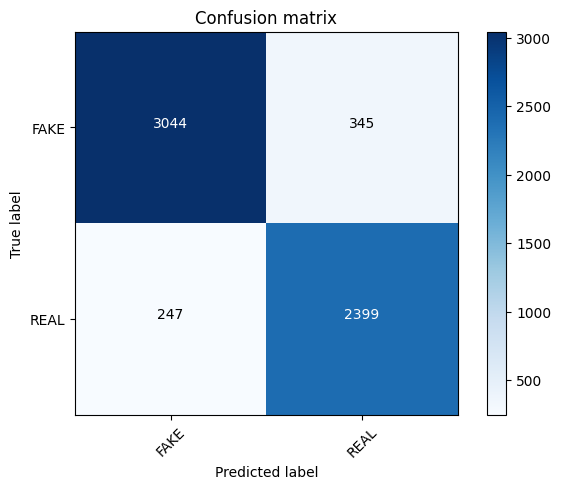

In [38]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [39]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9019055509527755

In [40]:
y_train.shape

(12250,)

<b>Setting Parameter</b>

In [41]:
classifier=MultinomialNB(alpha=0.1)

In [42]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.0, Score : 0.8903065451532726
Alpha: 0.1, Score : 0.9020712510356255
Alpha: 0.2, Score : 0.9025683512841757
Alpha: 0.30000000000000004, Score : 0.9024026512013256
Alpha: 0.4, Score : 0.9017398508699255
Alpha: 0.5, Score : 0.9015741507870754
Alpha: 0.6000000000000001, Score : 0.9022369511184756
Alpha: 0.7000000000000001, Score : 0.9025683512841757
Alpha: 0.8, Score : 0.9015741507870754
Alpha: 0.9, Score : 0.9017398508699255


In [44]:
## Get Features names
feature_names = cv.get_feature_names_out()

In [46]:
import numpy as np

# Mendapatkan bobot fitur dari model Multinomial Naive Bayes
feature_names = cv.get_feature_names_out()
coefficients = np.exp(classifier.feature_log_prob_[1])  # Ganti [1] dengan kelas yang sesuai

# Urutkan bobot fitur berdasarkan nilai tertinggi
sorted_coefficients = sorted(list(zip(feature_names, coefficients)), key=lambda x: x[1], reverse=True)

# Tampilkan 20 fitur dengan bobot tertinggi
top_20_features = sorted_coefficients[:20]
print(top_20_features)


[('trump', 0.018312907193949624), ('hillari', 0.013734110893434785), ('clinton', 0.012321745865415295), ('elect', 0.007446808510638304), ('new', 0.005647182103968294), ('comment', 0.005328260968609052), ('video', 0.005123240238735252), ('war', 0.004576518292405125), ('us', 0.004530958130210947), ('hillari clinton', 0.004462617886919681), ('fbi', 0.00443983780582259), ('vote', 0.004166476832657528), ('email', 0.0038247756162011984), ('world', 0.00377921545400702), ('obama', 0.0035741947241332223), ('donald', 0.003232493507676889), ('donald trump', 0.0031413731832885348), ('russia', 0.003073032939997268), ('day', 0.002890792291220558), ('america', 0.0028452321290263808)]


In [50]:
# Probabilitas posterior untuk setiap fitur dalam kelas pertama
probabilities = classifier.feature_log_prob_[0]

# Membuat daftar berisi pasangan fitur dan probabilitasnya
feature_probabilities = list(zip(feature_names, probabilities))

# Mengurutkan berdasarkan probabilitasnya (most real)
most_real_features = sorted(feature_probabilities, key=lambda x: x[1], reverse=True)[:20]
print(most_real_features)


[('new', -2.9468577463990755), ('time', -2.994219848520549), ('york', -3.000566240637532), ('new york', -3.0008020674474167), ('new york time', -3.014815217142134), ('york time', -3.014815217142134), ('breitbart', -3.9648310157438633), ('trump', -4.004573851696944), ('donald', -5.2756841712452855), ('donald trump', -5.282590276041697), ('say', -5.755045510465673), ('obama', -5.992274458590198), ('clinton', -6.016039835625665), ('presid', -6.106599412671392), ('state', -6.122523316028115), ('report', -6.177512429323892), ('attack', -6.188882648465076), ('hous', -6.253840544739848), ('brief', -6.259960514881633), ('hillari', -6.316793989644799)]


In [52]:
# Probabilitas log untuk setiap fitur dalam kelas pertama (fake)
log_probabilities = classifier.feature_log_prob_[0]

# Membuat daftar berisi pasangan fitur dan probabilitas log-nya
feature_log_probabilities = list(zip(feature_names, log_probabilities))

# Mengurutkan berdasarkan probabilitas log (most fake)
most_fake_features = sorted(feature_log_probabilities, key=lambda x: x[1])[:5000]
print(most_fake_features)


[('access pipelin protest', -11.458457546147459), ('acknowledg emf', -11.458457546147459), ('acknowledg emf damag', -11.458457546147459), ('acquit', -11.458457546147459), ('acr', -11.458457546147459), ('adhd', -11.458457546147459), ('airstrik kill', -11.458457546147459), ('al nusra', -11.458457546147459), ('america last', -11.458457546147459), ('america vote', -11.458457546147459), ('american concern', -11.458457546147459), ('american concern elect', -11.458457546147459), ('american peopl defeat', -11.458457546147459), ('aqsa', -11.458457546147459), ('arabian', -11.458457546147459), ('ariel noyola', -11.458457546147459), ('ariel noyola rodr', -11.458457546147459), ('ask question', -11.458457546147459), ('auf', -11.458457546147459), ('avail', -11.458457546147459), ('babi powder', -11.458457546147459), ('bad news', -11.458457546147459), ('badg', -11.458457546147459), ('ballot', -11.458457546147459), ('baltic', -11.458457546147459), ('banana', -11.458457546147459), ('banana republ', -11.4

In [53]:
train=pd.read_csv('../content/drive/fakedb_train.csv')
test=pd.read_csv('../content/drive/fakedb_test.csv')
test.info()
test['label']='t'
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [54]:
from sklearn.feature_extraction.text import TfidfTransformer

test=test.fillna(' ')
train=train.fillna(' ')
test['total']=test['title']+' '+test['author']+test['text']
train['total']=train['title']+' '+train['author']+train['text']

#tfidf
transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
counts = count_vectorizer.fit_transform(train['total'].values)
tfidf = transformer.fit_transform(counts)

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

#data prep
test=test.fillna(' ')
train=train.fillna(' ')
test['total']=test['title']+' '+test['author']+test['text']
train['total']=train['title']+' '+train['author']+train['text']

#tfidf
transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
counts = count_vectorizer.fit_transform(train['total'].values)
tfidf = transformer.fit_transform(counts)

In [56]:
targets = train['label'].values
test_counts = count_vectorizer.transform(test['total'].values)
test_tfidf = transformer.fit_transform(test_counts)

#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf, targets, random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:1682: RuntimeWarning: divide by zero encountered in divide
  idf = np.log(n_samples / df) + 1


In [57]:
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)

Extr = ExtraTreesClassifier(n_estimators=5,n_jobs=4)
Extr.fit(X_train, y_train)
print('Accuracy of ExtrTrees classifier on training set: {:.2f}'
     .format(Extr.score(X_train, y_train)))
print('Accuracy of Extratrees classifier on test set: {:.2f}'
     .format(Extr.score(X_test, y_test)))

Accuracy of ExtrTrees classifier on training set: 1.00
Accuracy of Extratrees classifier on test set: 0.85


In [58]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, y_train)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(NB.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(X_test, y_test)))

Accuracy of NB  classifier on training set: 0.88
Accuracy of NB classifier on test set: 0.78


In [59]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
print('Accuracy of Lasso classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Lasso classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Lasso classifier on training set: 1.00
Accuracy of Lasso classifier on test set: 0.98


In [60]:
targets = train['label'].values
logreg = LogisticRegression()
logreg.fit(counts, targets)

example_counts = count_vectorizer.transform(test['total'].values)
predictions = logreg.predict(example_counts)
pred=pd.DataFrame(predictions,columns=['label'])
pred['id']=test['id']
pred.groupby('label').count()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,id
label,
0,2603
1,2597


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['label'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['id'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['label'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['id'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_4, *[[['label', 'id']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_5, *['label', 'id', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_6, *['label', 'count()', None], **{})
chart

In [61]:
pred.to_csv('countvect5.csv', index=False)

<b>Report</b><br><br>
Pada jurnal dengan judul "Performance of bernoulli’s naive bayes classifier in the detection of fake news" yang ditulis oleh Mandeep Singh, Mohammed Wasim Bhatt, Harpreet Singh Bedi, Umang Mishra menjelaskan bahwa Media sosial menggantikan surat kabar dan TV sebagai sumber utama berita. Sekitar 62% orang dewasa di AS mendapatkan berita dari media sosial. Namun, media sosial juga menyebarkan berita palsu dan propaganda. Pada Penelitian tersebut menggunakan algoritma Bernoulli's Naive Bayes Classifier untuk mendeteksi berita palsu dan hasilnya lebih baik daripada Gaussian Naive Bayes, dengan peningkatan akurasi 10%, presisi 15%, dan F1 measure 6%, dimana hasil yang didapatkan sebesar 83% dibanding dengan penelitian terdahulu. Adapun percobaan yang dilakukan menggunakan Model Multinomial Naive Bayes. Adapun hasil eksperimen yang diberikan lebih baik dibanding dengan 2 model lainnya dimana hasil yang didapat sebesar 90%. 